In [ ]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git 
!pip install geopy

fatal: destination path 'algorithmic_complexity' already exists and is not an empty directory.


In [ ]:
from algorithmic_complexity.aclib import graphstuff as gs
from queue import Queue
from collections import deque
from itertools import permutations
from math import hypot

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import math
import heapq as hq
import json 

In [ ]:
url = "https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/poblaciones.csv"
poblacionesDF=pd.read_csv(url)

In [ ]:
print(len(poblacionesDF))
poblacionesDF.head()

3757


,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,NMI1,NMI2
0,AMAZONAS,BAGUA,ARAMANGO,EL MUYO (C.P.L.),-5.422545,-78.45299,311,1206
1,AMAZONAS,BAGUA,ARAMANGO,RESERVA UJUCANO,-5.427565,-78.444372,44,129
2,AMAZONAS,BAGUA,ARAMANGO,TUTUMBEROS,-5.327317,-78.44472,49,179
3,AMAZONAS,BAGUA,BAGUA,ALENYA BAJO,-5.682439,-78.495229,3,8
4,AMAZONAS,BONGARA,CUISPES,MITOPAMPA,-5.93856,-77.965302,1,4


In [ ]:
nomprovincias = poblacionesDF['PROVINCIA'].unique()
print(len(nomprovincias))
nomprovincias

157


array(['BAGUA', 'BONGARA', 'CHACHAPOYAS', 'UTCUBAMBA', 'ANTONIO RAYMONDI',
       'BOLOGNESI', 'CARHUAZ', 'CASMA', 'HUARAZ', 'HUARI', 'HUAYLAS',
       'OCROS', 'POMABAMBA', 'RECUAY', 'SANTA', 'SIHUAS', 'YUNGAY',
       'ABANCAY', 'ANDAHUAYLAS', 'ANTABAMBA', 'AYMARAES', 'CHINCHEROS',
       'GRAU', 'AREQUIPA', 'CAMANA', 'CARAVELI', 'CASTILLA', 'CAYLLOMA',
       'CONDESUYOS', 'CANGALLO', 'HUAMANGA', 'HUANCA SANCOS', 'HUANTA',
       'LUCANAS', 'PARINACOCHAS', 'VICTOR FAJARDO', 'CAJABAMBA',
       'CAJAMARCA', 'CELENDIN', 'CHOTA', 'CONTUMAZA', 'CUTERVO', 'JAEN',
       'SAN IGNACIO', 'SAN MARCOS', 'SAN MIGUEL', 'SAN MIMGUEL',
       'SANTA CRUZ', 'ACOMAYO', 'CALCA', 'CANAS', 'CANCHIS',
       'CHUMBIVILCAS', 'LA CONVENCION', 'PARURO', 'QUISPICANCHI',
       'PROVINCIA', 'CASTROVIRREYNA', 'CHURCAMPA', 'HUANCAVELICA',
       'HUAYTARA', 'TAYACAJA', 'AMBO', 'DOS DE MAYO', 'DOSDEMAYO',
       'HUAMALIES', 'HUANUCO SANTA', 'HUANUCO', 'LAURICOCHA',
       'LEONCIO PRADO', 'MARAÑON', 'PUERTO I

In [ ]:
provincias = dict()
for nom in nomprovincias:
  provincias[nom] = poblacionesDF[poblacionesDF['PROVINCIA'] == nom]
  print(nom, len(provincias[nom]))

BAGUA 4
BONGARA 8
CHACHAPOYAS 1
UTCUBAMBA 12
ANTONIO RAYMONDI 2
BOLOGNESI 5
CARHUAZ 20
CASMA 14
HUARAZ 38
HUARI 20
HUAYLAS 5
OCROS 2
POMABAMBA 21
RECUAY 28
SANTA 22
SIHUAS 6
YUNGAY 7
ABANCAY 41
ANDAHUAYLAS 8
ANTABAMBA 2
AYMARAES 23
CHINCHEROS 12
GRAU 1
AREQUIPA 24
CAMANA 16
CARAVELI 16
CASTILLA 1
CAYLLOMA 20
CONDESUYOS 3
CANGALLO 20
HUAMANGA 3
HUANCA SANCOS 38
HUANTA 7
LUCANAS 92
PARINACOCHAS 1
VICTOR FAJARDO 29
CAJABAMBA 10
CAJAMARCA 13
CELENDIN 16
CHOTA 6
CONTUMAZA 16
CUTERVO 6
JAEN 11
SAN IGNACIO 2
SAN MARCOS 2
SAN MIGUEL 13
SAN MIMGUEL 1
SANTA CRUZ 1
ACOMAYO 14
CALCA 3
CANAS 4
CANCHIS 12
CHUMBIVILCAS 3
LA CONVENCION 13
PARURO 14
QUISPICANCHI 22
PROVINCIA 1
CASTROVIRREYNA 49
CHURCAMPA 1
HUANCAVELICA 6
HUAYTARA 32
TAYACAJA 1
AMBO 37
DOS DE MAYO 7
DOSDEMAYO 1
HUAMALIES 6
HUANUCO SANTA 1
HUANUCO 27
LAURICOCHA 11
LEONCIO PRADO 28
MARAÑON 12
PUERTO INCA 9
CHINCHA 1
ICA 60
NASCA 6
PALPA 30
PISCO 14
CHANCHAMAYO 14
CHUPACA 13
CONCEPCION 1
HUANCAYO 13
JAUJA 1
JUNIN 2
SATIPO 6
TARMA 35
ASCOPE

In [ ]:
#@title Provincia 
#@markdown Ingrese la provincia

no_type_checking = ''
nom_provincia = 'BONGARA' #@param {type:"string"}
nom_distrito = 'JAZAN' #@param {type: "string"}

In [ ]:
nomdistritos = provincias[nom_provincia]['DISTRITO'].unique()
print(len(nomdistritos))
nomdistritos

2


array(['CUISPES', 'JAZAN'], dtype=object)

In [ ]:
distritos = dict()
for nom in nomdistritos:
  distritos[nom] = provincias[nom_provincia][provincias[nom_provincia]['DISTRITO'] == nom]
  print(distritos[nom])
  

  DEPARTAMENTO PROVINCIA DISTRITO  ...    LONGITUD NMI1 NMI2
4     AMAZONAS   BONGARA  CUISPES  ...  -77.965302    1    4

[1 rows x 8 columns]
   DEPARTAMENTO PROVINCIA DISTRITO  ...    LONGITUD  NMI1  NMI2
5      AMAZONAS   BONGARA    JAZAN  ...  -77.976755     4    15
6      AMAZONAS   BONGARA    JAZAN  ...  -77.977098  1365  5361
7      AMAZONAS   BONGARA    JAZAN  ...   -77.97635     2     7
8      AMAZONAS   BONGARA    JAZAN  ...   -77.97886     3     6
9      AMAZONAS   BONGARA    JAZAN  ...  -77.972108     1     5
10     AMAZONAS   BONGARA    JAZAN  ...  -77.974682    11    36
11     AMAZONAS   BONGARA    JAZAN  ...  -77.977918     0     0

[7 rows x 8 columns]


In [ ]:
distrito = distritos[nom_distrito]
distrito

,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,NMI1,NMI2
5,AMAZONAS,BONGARA,JAZAN,NUEVA ESPERANZA,-5.935482,-77.976755,4,15
6,AMAZONAS,BONGARA,JAZAN,PEDRO RUIZ GALLO,-5.941387,-77.977098,1365,5361
7,AMAZONAS,BONGARA,JAZAN,PEDRO RUIZ,-5.94069,-77.97635,2,7
8,AMAZONAS,BONGARA,JAZAN,SAN JERONIMO,-5.95036,-77.97886,3,6
9,AMAZONAS,BONGARA,JAZAN,SANTA ROSA,-5.932149,-77.972108,1,5
10,AMAZONAS,BONGARA,JAZAN,SEÑOR DE GUALAMITA,-5.935217,-77.974682,11,36
11,AMAZONAS,BONGARA,JAZAN,VILLA ERNESTINA,-5.934992,-77.977918,0,0


In [ ]:
def distancia(centro_poblado1, centro_poblado2):
  la1, lo1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
  la2, lo2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])
  
  lo1, la1, lo2, la2 = map(math.radians, [lo1, la1, lo2, la2])
  dlo = lo2 - lo1
  dla = la2 - la1
  a = math.sin(dla/2)**2 + math.cos(la1) * math.cos(la2) * math.sin(dlo/2)**2
  c = 2 * math.asin(math.sqrt(a))
  r = 6371

  return round(c * r, 2)

In [ ]:
G = nx.Graph()
col = 'CENTRO POBLADO'
for i, cp1 in distrito.iterrows():
  for j, cp2 in distrito.iterrows():
    if cp1[col] != cp2[col]:
      print(cp1[col],",",cp2[col],",",distancia(cp1, cp2))
      G.add_edge(cp1[col], cp2[col], weight=distancia(cp1, cp2))

NUEVA ESPERANZA , PEDRO RUIZ GALLO , 0.66
NUEVA ESPERANZA , PEDRO RUIZ , 0.58
NUEVA ESPERANZA , SAN JERONIMO , 1.67
NUEVA ESPERANZA , SANTA ROSA , 0.63
NUEVA ESPERANZA , SEÑOR DE GUALAMITA , 0.23
NUEVA ESPERANZA , VILLA ERNESTINA , 0.14
PEDRO RUIZ GALLO , NUEVA ESPERANZA , 0.66
PEDRO RUIZ GALLO , PEDRO RUIZ , 0.11
PEDRO RUIZ GALLO , SAN JERONIMO , 1.02
PEDRO RUIZ GALLO , SANTA ROSA , 1.17
PEDRO RUIZ GALLO , SEÑOR DE GUALAMITA , 0.74
PEDRO RUIZ GALLO , VILLA ERNESTINA , 0.72
PEDRO RUIZ , NUEVA ESPERANZA , 0.58
PEDRO RUIZ , PEDRO RUIZ GALLO , 0.11
PEDRO RUIZ , SAN JERONIMO , 1.11
PEDRO RUIZ , SANTA ROSA , 1.06
PEDRO RUIZ , SEÑOR DE GUALAMITA , 0.64
PEDRO RUIZ , VILLA ERNESTINA , 0.66
SAN JERONIMO , NUEVA ESPERANZA , 1.67
SAN JERONIMO , PEDRO RUIZ GALLO , 1.02
SAN JERONIMO , PEDRO RUIZ , 1.11
SAN JERONIMO , SANTA ROSA , 2.16
SAN JERONIMO , SEÑOR DE GUALAMITA , 1.75
SAN JERONIMO , VILLA ERNESTINA , 1.71
SANTA ROSA , NUEVA ESPERANZA , 0.63
SANTA ROSA , PEDRO RUIZ GALLO , 1.17
SANTA ROSA , P

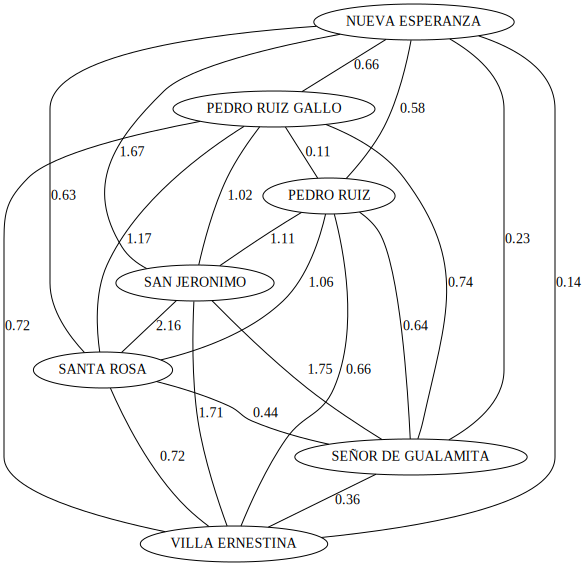

In [ ]:

gs.nx2gv(G, weighted=True, params={'size':'15'}, nodeinfo=True)


In [ ]:
#@title Ingrese el centro poblado que desea analizar su ruta:
nom_centroPoblado = 'NUEVA ESPERANZA' #@param {type:"string"}


In [ ]:
ruta = dict()
for n in list(G):
  ruta[n] = {}
  for j in G.neighbors(n):
    result  = json.dumps(G.get_edge_data(n,j,default = 0))
    result = result.replace('{"weight":','')
    result = result.replace('}', ' ')
    result=float(result)
    result=result *10
    result= int(result)
    ruta[n][j] = result

In [ ]:
print(ruta)

{'NUEVA ESPERANZA': {'PEDRO RUIZ GALLO': 6, 'PEDRO RUIZ': 5, 'SAN JERONIMO': 16, 'SANTA ROSA': 6, 'SEÑOR DE GUALAMITA': 2, 'VILLA ERNESTINA': 1}, 'PEDRO RUIZ GALLO': {'NUEVA ESPERANZA': 6, 'PEDRO RUIZ': 1, 'SAN JERONIMO': 10, 'SANTA ROSA': 11, 'SEÑOR DE GUALAMITA': 7, 'VILLA ERNESTINA': 7}, 'PEDRO RUIZ': {'NUEVA ESPERANZA': 5, 'PEDRO RUIZ GALLO': 1, 'SAN JERONIMO': 11, 'SANTA ROSA': 10, 'SEÑOR DE GUALAMITA': 6, 'VILLA ERNESTINA': 6}, 'SAN JERONIMO': {'NUEVA ESPERANZA': 16, 'PEDRO RUIZ GALLO': 10, 'PEDRO RUIZ': 11, 'SANTA ROSA': 21, 'SEÑOR DE GUALAMITA': 17, 'VILLA ERNESTINA': 17}, 'SANTA ROSA': {'NUEVA ESPERANZA': 6, 'PEDRO RUIZ GALLO': 11, 'PEDRO RUIZ': 10, 'SAN JERONIMO': 21, 'SEÑOR DE GUALAMITA': 4, 'VILLA ERNESTINA': 7}, 'SEÑOR DE GUALAMITA': {'NUEVA ESPERANZA': 2, 'PEDRO RUIZ GALLO': 7, 'PEDRO RUIZ': 6, 'SAN JERONIMO': 17, 'SANTA ROSA': 4, 'VILLA ERNESTINA': 3}, 'VILLA ERNESTINA': {'NUEVA ESPERANZA': 1, 'PEDRO RUIZ GALLO': 7, 'PEDRO RUIZ': 6, 'SAN JERONIMO': 17, 'SANTA ROSA': 7, '

In [ ]:
def camino(G):
  path = [0]*G.number_of_nodes()
  for v, info in G.nodes.data():
    path[v] = info['camino']
  return path

In [ ]:
#Utilizando Dijkstra
def dijkstra(G, s):
  for u in G.nodes:
    G.nodes[u]['visited'] = False
    G.nodes[u]['path']    = -1
    G.nodes[u]['cost']    = math.inf

  G.nodes[s]['cost'] = 0
  q = [(0, s)]
  while q:
    g_u, u = hq.heappop(q)
    if not G.nodes[u]['visited']:
      G.nodes[u]['visited'] = True
      for v in G.neighbors(u):
        if not G.nodes[v]['visited']:
          w_uv = G.get_edge_data(u, v)['weight']
          f_v  = g_u + w_uv
          g_v  = G.nodes[v]['cost']      
          if f_v < g_v:
            G.nodes[v]['cost'] = f_v
            G.nodes[v]['path'] = u
            hq.heappush(q, (f_v, v))
  path = dict()
  for v, info in G.nodes.data():
    path[v] = info['path']

  return path

{'NUEVA ESPERANZA': -1, 'PEDRO RUIZ GALLO': 'NUEVA ESPERANZA', 'PEDRO RUIZ': 'NUEVA ESPERANZA', 'SAN JERONIMO': 'NUEVA ESPERANZA', 'SANTA ROSA': 'NUEVA ESPERANZA', 'SEÑOR DE GUALAMITA': 'NUEVA ESPERANZA', 'VILLA ERNESTINA': 'NUEVA ESPERANZA'}


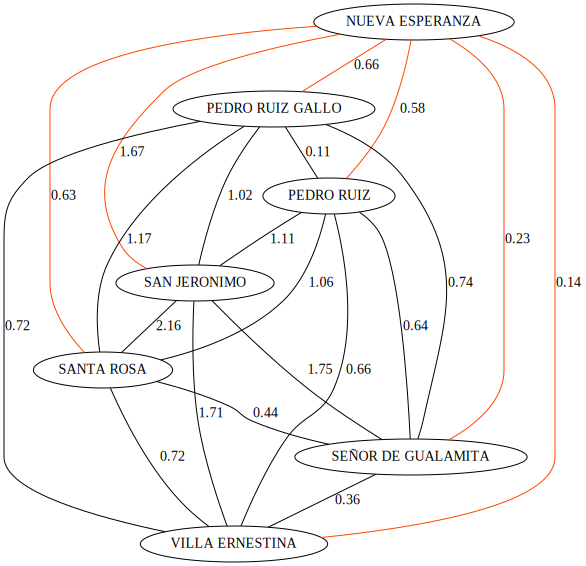

In [ ]:
path = dijkstra(G,nom_centroPoblado )
print(path)
gs.nx2gv(G, path = path, weighted = True, params = {'size':'15'})

In [263]:
# APLICANDO BACKTRACK
answer = []
path = []
paths = []

#Convierte el G de networX a una lista 2D (matrix)
def graph_to_matrix(G):
  matrix = []
  centros_poblados = list(G.nodes('label'))
  for i in range(len(G)):
    row = []
    for j in range(len(G)):
      
      cp1 = list(G.nodes())[i]
      cp2 = list(G.nodes())[j]
      
      if cp1 == cp2:
        row.append(0)
      else:
        row.append(G.get_edge_data(cp1,cp2)['weight'])
        
    matrix.append(row.copy())
  return matrix

def print_answer(G):
  global paths
  global answer
  p = paths[answer.index(min(answer))]
  print("Shortest path: " + "\n")
  for i in range(len(G)):
    cps = list(G.nodes())
    if i < (len(G) - 1):
      cost = G.get_edge_data(cps[p[i]], cps[p[i+1]])['weight']
      print("- " + cps[p[i]] + " -> " + cps[p[i+1]] + "  " + str(cost))
  print("- " + cps[p[-1]] + " -> " + cps[p[0]] + "  " + str(G.get_edge_data(cps[p[-1]], cps[p[0]])['weight']) + "\n")
  print("Distancia Minima: " + str(min(answer)))

def solve_bt(graph, v, currPos, n, count, cost, path):
  global paths
  if (count == n and graph[currPos][0]):
    answer.append(cost + graph[currPos][0])
    paths.append(path.copy())
    return

  # BACKTRACKING
  for i in range(n):
    if (v[i] == False and graph[currPos][i]): 
      # marcar como visitado
      v[i] = True
      path.append(i)

      solve_bt(graph, v, i, n, count + 1, 
          cost + graph[currPos][i], path)
        
      # desmarcar
      v[i] = False
      path.remove(i)

# n is the number of nodes
n = len(G)
graph = graph_to_matrix(G)

v = [False for i in range(n)]

#Marcar primer Centro Poblado como visitado
v[0] = True
path.append(0)
solve_bt(graph, v, 0, n, 1, 0, path)

print_answer(G)



Shortest path: 

- NUEVA ESPERANZA -> SANTA ROSA  0.63
- SANTA ROSA -> SEÑOR DE GUALAMITA  0.44
- SEÑOR DE GUALAMITA -> PEDRO RUIZ  0.64
- PEDRO RUIZ -> PEDRO RUIZ GALLO  0.11
- PEDRO RUIZ GALLO -> SAN JERONIMO  1.02
- SAN JERONIMO -> VILLA ERNESTINA  1.71
- VILLA ERNESTINA -> NUEVA ESPERANZA  0.14

Distancia Minima: 4.6899999999999995


In [262]:

#APLICANDO BFS

visitado = []
queue = []
distancia = []

def bfs(G, visitado, inicio, fin):
  visitado.append(inicio)
  queue.append(inicio)
  
  while queue:
    m = queue.pop(0)
    print (m, end = " ")

    for neighbour in G.nodes():
      if neighbour not in visitado:
        visitado.append(neighbour)
        queue.append(neighbour)
      if G.neighbors in visitado:
        visitado.append(fin)
    

bfs(G, visitado, nom_centroPoblado,nom_centroPoblado)
print("->","Distancia Minima: " + str(min(answer)))


NUEVA ESPERANZA PEDRO RUIZ GALLO PEDRO RUIZ SAN JERONIMO SANTA ROSA SEÑOR DE GUALAMITA VILLA ERNESTINA -> Distancia Minima: 4.6899999999999995
